In [9]:
import os
import shutil

# Create the directory if it doesn't exist
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Copy the file
shutil.copy("kaggle.json", kaggle_dir)



'C:\\Users\\jyoti/.kaggle\\kaggle.json'

In [11]:
!pip install kaggle

!kaggle datasets download -d salader/dogs-vs-cats


     ---------------------------------------- 0.0/83.6 kB ? eta -:--:--
     ---------------------------------------- 83.6/83.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/78.2 kB ? eta -:--:--
     ---------------------------------------- 78.2/78.2 kB 4.5 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110693 sha256=5690f07b17f5f6df187fbfd60dcd8a458d361c756edea221e7571e245dfad0c0
  Stored in directory: c:\users\jyoti\appdata\local\pip\cache\wheels\43\4b\fb\736478af5e8004810081a06259f9aa2f7c3329fc5d03c2c412
Successfully built kaggle




  0%|          | 0.00/1.06G [00:00<?, ?B/s]
  0%|          | 1.00M/1.06G [00:01<27:13, 699kB/s]
  0%|          | 2.00M/1.06G [00:01<13:38, 1.39MB/s]
  0%|          | 3.00M/1.06G [00:01<08:27, 2.25MB/s]
  0%|          | 4.00M/1.06G [00:01<06:00, 3.16MB/s]
  1%|          | 7.00M/1.06G [00:02<02:47, 6.76MB/s]
  1%|          | 9.00M/1.06G [00:02<02:11, 8.65MB/s]
  1%|          | 11.0M/1.06G [00:02<02:12, 8.53MB/s]
  1%|          | 13.0M/1.06G [00:02<02:44, 6.88MB/s]
  1%|▏         | 15.0M/1.06G [00:03<02:15, 8.30MB/s]
  2%|▏         | 18.0M/1.06G [00:03<01:36, 11.6MB/s]
  2%|▏         | 20.0M/1.06G [00:03<01:25, 13.1MB/s]
  2%|▏         | 23.0M/1.06G [00:03<01:09, 16.2MB/s]
  2%|▏         | 25.0M/1.06G [00:03<01:15, 14.8MB/s]
  2%|▏         | 27.0M/1.06G [00:03<01:14, 14.9MB/s]
  3%|▎         | 30.0M/1.06G [00:03<01:06, 16.8MB/s]
  3%|▎         | 32.0M/1.06G [00:04<01:06, 16.8MB/s]
  3%|▎         | 34.0M/1.06G [00:04<01:03, 17.3MB/s]
  3%|▎         | 36.0M/1.06G [00:04<01:05, 17.0MB/s]
  

In [18]:
#unzipping the abstracted file
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
# Importing the necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

In [20]:
# Load the ResNet50 model with pre-trained weights (include_top=False for feature extraction)
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))




94765736/94765736 [==============================] - 10s 0us/step


In [21]:
# Freeze the pre-trained layers
for layer in resnet_model.layers:
    layer.trainable = False

# Create a new sequential model and add the ResNet50 model
model = Sequential()
model.add(resnet_model)

# Flatten the output from ResNet50 and add a fully connected layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification (e.g., cats vs. dogs)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 36695425 (139.98 MB)
Trainable params: 13107713 (50.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [24]:
# Create data generators with data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


C:\Users\jyoti\AppData\Local\Temp\ipykernel_5592\264072628.py:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10



625/625 [==============================] - 2570s 4s/step - loss: 0.6884 - accuracy: 0.6101 - val_loss: 0.6710 - val_accuracy: 0.5754
Epoch 2/10
625/625 [==============================] - 916s 1s/step - loss: 0.6142 - accuracy: 0.6625 - val_loss: 0.7114 - val_accuracy: 0.5692
Epoch 3/10
625/625 [==============================] - 856s 1s/step - loss: 0.6034 - accuracy: 0.6697 - val_loss: 0.5778 - val_accuracy: 0.7034
Epoch 4/10
625/625 [==============================] - 792s 1s/step - loss: 0.5912 - accuracy: 0.6817 - val_loss: 0.5826 - val_accuracy: 0.6980
Epoch 5/10
625/625 [==============================] - 708s 1s/step - loss: 0.5803 - accuracy: 0.6935 - val_loss: 0.6308 - val_accuracy: 0.6500
Epoch 6/10
625/625 [==============================] - 779s 1s/step - loss: 0.5743 - accuracy: 0.7028 - val_loss: 0.5769 - val_accuracy: 0.6992
Epoch 7/10
625/625 [==============================] - 823s 1s/step - loss: 0.5726 - accuracy: 0.6957 - val_loss: 0.5363 - val_accuracy: 0.7338
Epoch 8/1

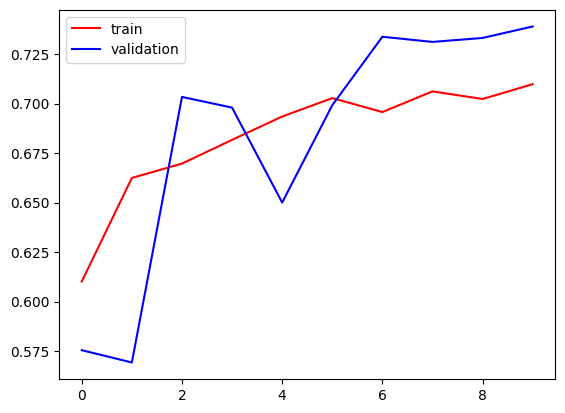

In [25]:
#checking the accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


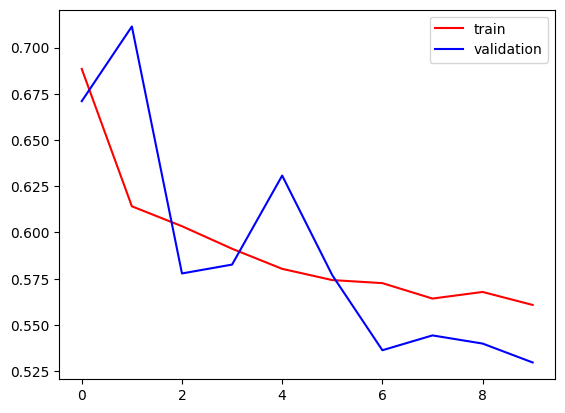

In [26]:
#checking the loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


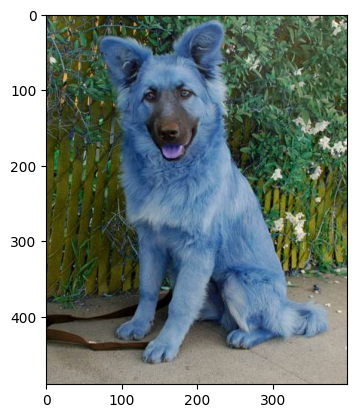

In [28]:
#TESTING ON NEWER IMAGES
#LOADING OUR IMAGE 
import cv2
test_img = cv2.imread('/content/test/dogs/dog.10014.jpg')
plt.imshow(test_img)

In [29]:
##CHECKING ITS SHAPE
test_img.shape

(490, 399, 3)

In [30]:
#DATA PREPROCESSING
#RESIZING THE SHAPE OF THE IMAGE
test_img = cv2.resize(test_img,(150,150))
test_input = test_img.reshape((1,150,150,3))
model.predict(test_input)

1/1 [==============================] - 2s 2s/step


array([[1.]], dtype=float32)

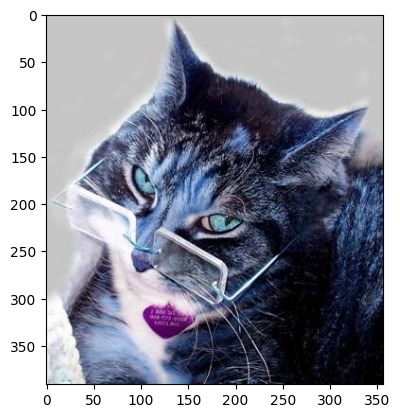

In [31]:
test_img = cv2.imread('/content/test/cats/cat.10035.jpg')
plt.imshow(test_img)
plt.show()


In [33]:
#getting the shape of image
test_img.shape


(391, 356, 3)

In [34]:
#resizing the image
test_img = cv2.resize(test_img,(150,150))
test_input = test_img.reshape((1,150,150,3))
#predicting the result
model.predict(test_input)


1/1 [==============================] - 0s 133ms/step


array([[1.]], dtype=float32)

***OBSERVATION: WE CAN SEE THAT OUR MODEL HAS PERFORMED REALLY WELL WITH A
TRAINING ACCURACY OF 93% AND VALIDATION ACCURACY OF 90%***

In [36]:
# Save the trained model
model.save('resnet_model.h5') 